# Задание про титаник

## Первичный анализ данных

### Загрузим библиотеки 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
# для игнорирования ошибок Анаконды
import warnings
warnings.simplefilter('ignore')



from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

### 1) Загрузка данных

In [2]:
data = pd.read_csv('titanic_train.csv')

### 2) Вывод первых 5 строк

In [11]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3) Вывод основной информации

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 4) Вывод статистической информации

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### 6) Избавимся от пустых значений

#### Найдем где находятся пустые значения

In [7]:
data.isna().sum() #pd.isnull(data).sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
data['Age']=data['Age'].fillna(data['Age'].median()) # data["Age"].fillna(data["Age"].median(), inplace = True)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].value_counts().idxmax())
data['Cabin'] = data['Cabin'].fillna(data['Cabin'].value_counts().idxmax())
pd.isnull(data).sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

### 7) Найдем колличество ж и м

In [10]:
print('Мужчин = ',len(data[data['Sex'] == 'male']))
print('Женщин = ',len(data[data['Sex'] == 'female']))

Мужчин =  577
Женщин =  314


In [11]:
data[data["Sex"] == "female"].shape

(314, 12)

### 8) распределение по классам

In [12]:
data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

#### отдельно для М и Ж

In [70]:
print('Для Мужчин: \n',data[data['Sex'] == 'male']['Pclass'].value_counts())
print('Для Женщин: \n',data[data['Sex'] == 'female']['Pclass'].value_counts())

Для Мужчин: 
 3    347
1    122
2    108
Name: Pclass, dtype: int64
Для Женщин: 
 3    144
1     94
2     76
Name: Pclass, dtype: int64


#### Мужчины 2 класса

In [14]:
len(data[(data['Sex'] == 'male') & (data['Pclass']==2)])

108

### 9)  Медиана и стандартное отклонение платежей 

#### Медиана

In [27]:
round(data['Fare'].median(),2)

14.45

#### SD

In [28]:
round(data['Fare'].std(),2)

49.69

# Визуализация

#### предворительно изменил некоторые столбцы

In [9]:
d2=data.copy()
d2['Sex'] = d2['Sex'].map({'male':'1','female':'0'})
d2['Embarked'] = d2['Embarked'].map({'S':'1','C':'2','Q':'3'})

### 10) Попарные зависимости признаков

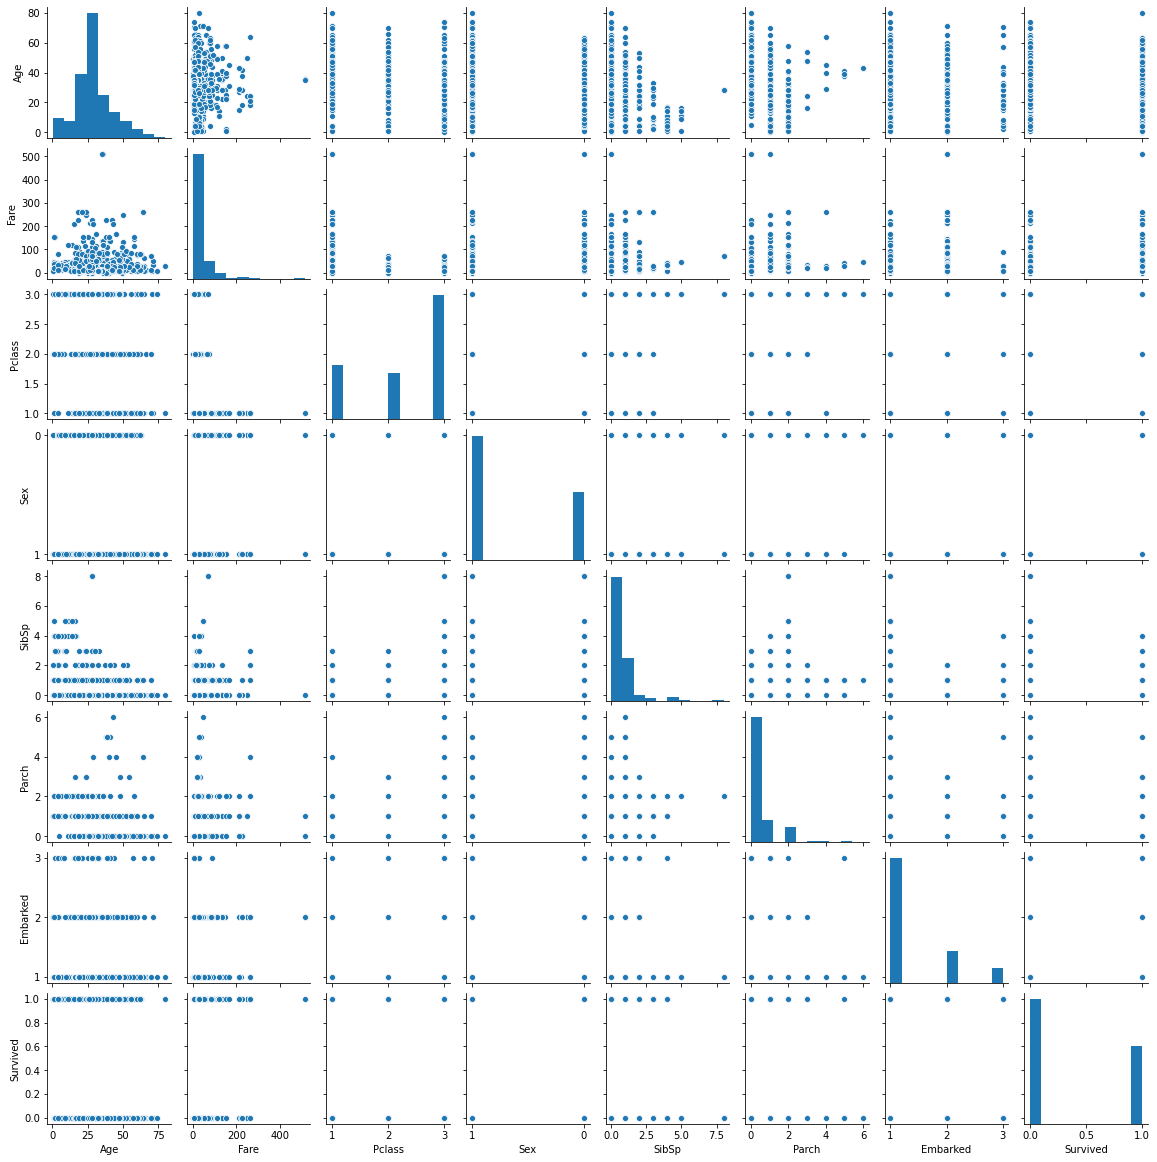

In [31]:
cols = ['Age', 'Fare', 'Pclass', 'Sex', 'SibSp','Parch','Embarked','Survived']
sns.pairplot(d2[cols],height=2);

### 11) Гистограмма распределения

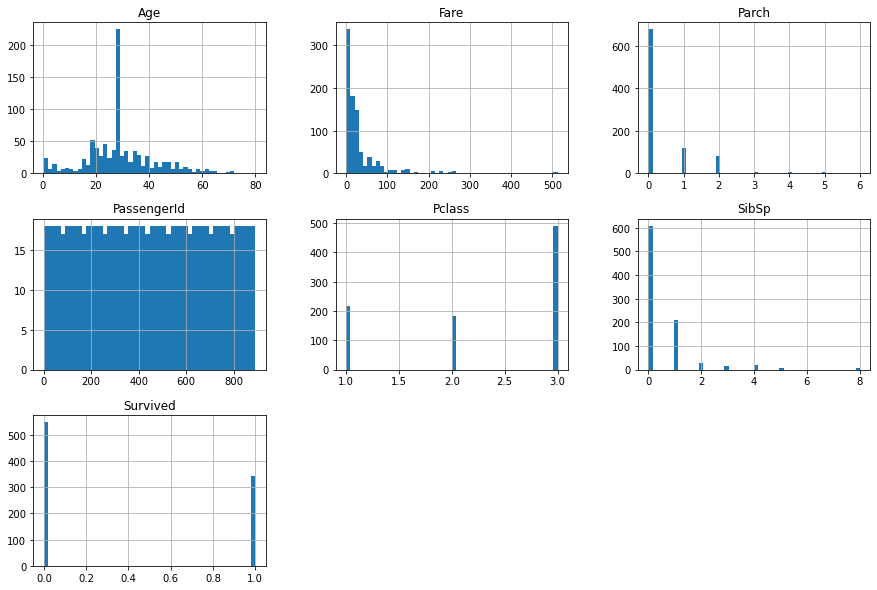

In [34]:
d2.hist(figsize = (15,10), bins = 50);

### 12) Зависимость платы за билет от класса каюты

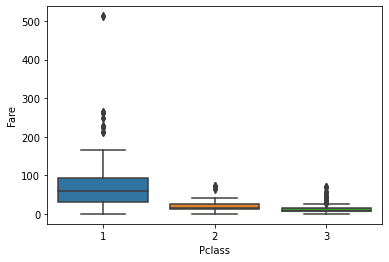

In [37]:
sns.boxplot(y='Fare',x='Pclass',data=d2);

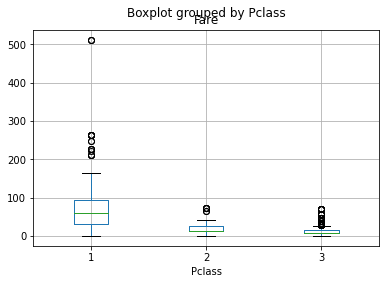

In [39]:
data.boxplot("Fare", "Pclass");

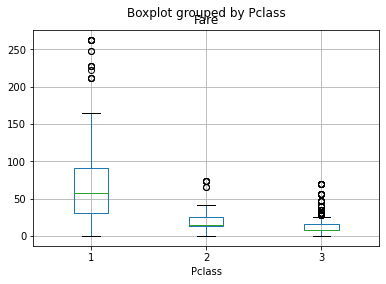

In [8]:
data[data['Fare']<500].boxplot("Fare", "Pclass");

### 13) выжившие

In [43]:
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

#### Зависимость выживания от пола(0 - Ж, 1 -М)

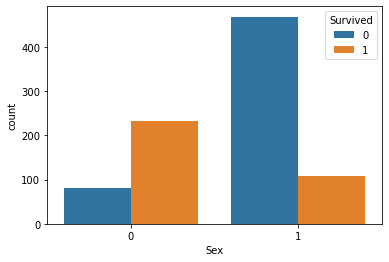

In [44]:
sns.countplot(x='Sex',hue='Survived',data=d2);

### 14) соотношение погибших и выживших в зависимости от класса каюты

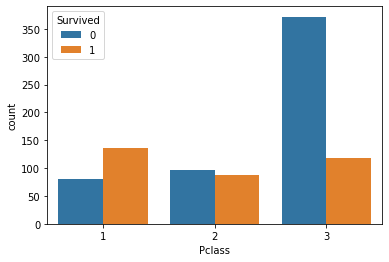

In [45]:
sns.countplot(x='Pclass',hue='Survived',data=d2);

### 15) Факт выживания от возраста 

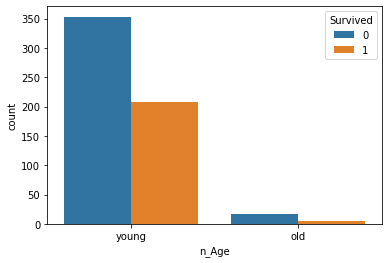

In [16]:
d2['Young']=d2['Age']<30
d2['Old']=d2['Age']>60
d2['n_Age']=(d2['Young'].map({True:'young'})).astype(str)+(d2['Old'].map({True:'old'})).astype(str)
d2['n_Age']=d2['n_Age'].map({'youngnan':'young','nanold':'old'})
sns.countplot(x='n_Age',hue='Survived',data=d2);

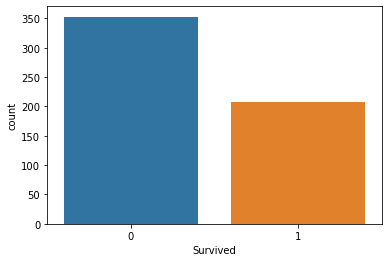

In [19]:
sns.countplot(data[data["Age"] < 30]["Survived"]);

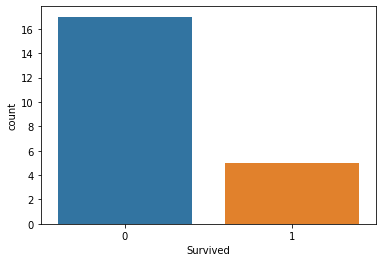

In [21]:
sns.countplot(data[data["Age"] > 60]["Survived"]);

### 16) График рассеяния на осях Age и Fare

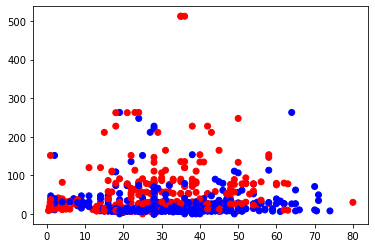

In [22]:
plt.scatter(x=d2['Age'],y=d2['Fare'], c=d2['Survived'].map({0: 'blue', 1: 'red'}));

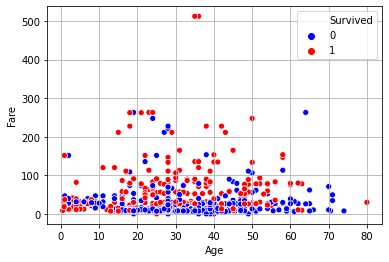

In [24]:
cmap = {0 : "blue", 1: "red"}
sns.scatterplot(data["Age"], data["Fare"], hue = data["Survived"], palette=cmap)
plt.grid()

### 17) Разбить данные на обучающую и проверучную выборки

#### Предварительно изменим или удалим признаки(столбцы), которые содержат строковые значения

#### Удалим "Name", "Ticket", "Cabin", так как содержат много уникальных значений и не несут полезной для нас информациии

In [10]:
d3=data
d3.drop(['Name'],axis=1,inplace = True) 
d3.drop(['Ticket'],axis=1,inplace = True)
d3.drop(['Cabin'],axis=1,inplace = True)

#### Мы можем изменим "Sex" и "Embarked", так как они содежат мало уникаьных значений.
#### Изменяем с помощью map()

In [19]:
d3['Sex'] = d3['Sex'].map({'male':'1','female':'0'})
d3['Embarked'] = d3['Embarked'].map({'S':'1','C':'2','Q':'3'})

#### Теперь выделим целевую переменную и разделим наши данные на обучающую и тестовую выборку, используя train_test_split()

#### y - целевая переменная (То что мы хотим предсказать)
#### x - все кроме y

In [14]:
y=d3['Survived'].astype('int')
X=d3.drop('Survived',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=0,stratify=y)

### 18) /

### 19) Построить корреляционную матрицу

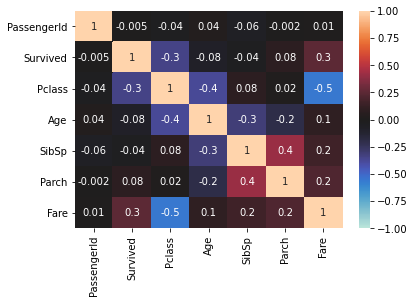

In [9]:
sns.heatmap(d3.corr(), annot = True,fmt='.1g',vmin=-1, vmax=1, center= 0);

### 20) Обучить модели и выбрать лучшую по точности

#### Метод kближайших соседей
#### перебираем параметр n_neighbors и находим лучший парамерт с помощью GridSearchCV

In [15]:
first_knn = KNeighborsClassifier()
knn_params = {'n_neighbors':range(1,10,1)}#+list(range(50,100,10))}
knn_grid = GridSearchCV(first_knn,knn_params,cv=5)
knn_grid.fit(X_train,y_train)
print(knn_grid.best_score_)
print(knn_grid.best_params_)
knn_grid.score(X_test, y_test)

0.6452903225806452
{'n_neighbors': 8}


0.6604477611940298

#### Метод деревьев решений

In [24]:
first_tree = DecisionTreeClassifier(random_state=0)
tree_params = {'max_depth':np.arange(1,30,3)}
tree_grid = GridSearchCV(first_tree,tree_params,cv=5)
tree_grid.fit(X_train,y_train)
print(tree_grid.best_score_)
print(tree_grid.best_params_)
print(tree_grid.score(X_test, y_test))

0.8073419354838709
{'max_depth': 4}
0.8097014925373134


#### Метод Ансамбли деревьев решений 
##### Ансамбли - это методы, которые сочетают в себе множество моделей машинного обучения, чтобы в итоге получить более мощную модель

##### Рандомный лес

In [29]:
first_forest = RandomForestClassifier(n_estimators=5, random_state=0)
forest_params = {'n_estimators':np.arange(1,30,5)}
forest_grid = GridSearchCV(first_forest,forest_params,cv=5)
forest_grid.fit(X_train, y_train)
print(forest_grid.best_score_)
print(forest_grid.best_params_)
forest_grid.score(X_test, y_test)

0.8218580645161291
{'n_estimators': 21}


0.832089552238806

#####  Градиентный бустинг деревьев

#### Еще один способ перебора параметров

In [51]:
best_score = 0
best_parameters = {'max_depth': 0}
for max_depth in np.arange(1,20,4):
    gbrt = GradientBoostingClassifier(random_state=0,max_depth=max_depth,learning_rate=0.1)
    gbrt.fit(X_train, y_train)
    score = gbrt.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_parameters = {'max_depth': max_depth,'learning_rate': 0.1}
gbrt = GradientBoostingClassifier(**best_parameters)
gbrt.fit(X_train, y_train)
print(gbrt.score(X_train, y_train))
print(best_parameters)
print(gbrt.score(X_test, y_test))

0.9951845906902087
{'max_depth': 5, 'learning_rate': 0.1}
0.835820895522388


#### Метод опорных векторов

In [53]:
best_score = 0
best_parameters = {'C': 0, 'gamma': 0}
for gamma in [0.001, 0.01, 0.1, 1, 10, 100]:
    for C in [0.001, 0.01, 0.1, 1, 10, 100]:
        svm = SVC(gamma=gamma, C=C)
        svm.fit(X_train, y_train)
        score = svm.score(X_test, y_test)
        if score > best_score:
            best_score = score
            best_parameters = {'gamma': gamma,'C': C}
svm = SVC(**best_parameters)
svm.fit(X_train, y_train)
print(svm.score(X_train, y_train))
print(best_parameters)
print(svm.score(X_test, y_test))

0.7544141252006421
{'gamma': 0.001, 'C': 1}
0.6567164179104478


### Метод нейронных сетей

In [66]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)
print(mlp.score(X_train, y_train))
print(mlp.score(X_test, y_test))

0.7399678972712681
0.7089552238805971


### 21) Предсказать Survived

#### Создадим свои данные, с помощью np.array()

In [71]:
my_data = np.array([[21,1,1,18,2,1,12,2]])

#### Для предсказания используем predict()

#### Лучший результат показал Градиентный бустинг деревьев(0.836), поэтому используем его

In [67]:
gbrt.predict(my_data)

array([1])